# Multilayer perceptron

## O que é?

Em deep learning, o conceito de perceptron diz respeito a um neurônio onde, dadas as entradas consegue calcular uma saída, levando em conta parâmetros como o peso de cada entrada e o fator bias. É muito útil em tarefas de classificação onde é possível diferenciar dois grupos por uma linha, contudo, quando o conjunto de dados não é linearmente separável, é necessário utilizar um conjunto de camadas de neurônios, por isso usa-se o MLP

A biblioteca Keras é utilizadaem problemas de deep learning

### Exemplo

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

O MLP consiste, então, em uma rede neural com uma camada de neurônios de entrada, X camadas "escondidas" (hidden layers) e uma camada de saída, é um modelo sequencial.

In [18]:
# importando ferramentas para construção de um modelo sequencial
from keras.models import Sequential
from keras.layers import Dense

Para o primeiro modelo serão atribuídos os seguintes valores de X0, X1 (entradas) e Y (saída)

|X0|X1|Y|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

In [87]:
#Definindo x e y
X = np.array([
    [0,0],[0,1],[1,0],[1,1]
])

y = np.array([0,1,1,0])

In [105]:
#Criando modelo sequencial
model = Sequential()

#Adicionando camadas ao modelo
model.add(Dense(2, input_shape=(2,)))

model.add(Dense(2, activation='softmax'))

model.add(Dense(1, activation='tanh'))

model.compile(optimizer='sgd', loss='mse')

model.fit(X, y, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 30ms/step - loss: 0.7392
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7063
Epoch 3/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6753
Epoch 4/30
1/1 [==============================] - 0s 7ms/step - loss: 0.6462
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 0.6190
Epoch 6/30
1/1 [==============================] - 0s 5ms/step - loss: 0.5937
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 0.5701
Epoch 8/30
1/1 [==============================] - 0s 3ms/step - loss: 0.5482
Epoch 9/30
1/1 [==============================] - 0s 11ms/step - loss: 0.5279
Epoch 10/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5091
Epoch 11/30
1/1 [==============================] - 0s 4ms/step - loss: 0.4918
Epoch 12/30
1/1 [==============================] - 0s 4ms/step - loss: 0.4757
Epoch 13/30
1/1 [==============================] - 0s 7ms/step - loss: 

In [89]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_90 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


#### Exemplo classificação 

MNIST dataset

In [94]:
mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 66s 15us/step


In [96]:
#Visualizando rótulos
#Cada número de 0 - 9 equivale a uma classe, pode ser sapato, camisa, short ...
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

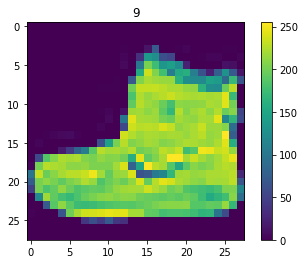

In [98]:
#Visualizando um registro
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.title(train_labels[0])
plt.show()

In [100]:
#É necessário normalizar as imagens, para isso o valor de cada pixel deve ser entre 0 e 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [113]:
### CONSTRUINDO O MODELO SEQUENCIAL
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #Transforma a matriz 28x28 em um array 28*28 = 784
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8951 - accuracy: 0.6766
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5770 - accuracy: 0.7897
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5140 - accuracy: 0.8162
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4735 - accuracy: 0.8315
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4468 - accuracy: 0.8408
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4266 - accuracy: 0.8487
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4123 - accuracy: 0.8514
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3980 - accuracy: 0.8576
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3873 - accuracy: 0.8609
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.37

In [115]:
#Avaliando a acurácia e o loss
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Acuracia:', test_acc)
print('Loss:', test_loss)

313/313 - 1s - loss: 0.4090 - accuracy: 0.8515
Acuracia: 0.8514999747276306
Loss: 0.4089741110801697


In [116]:
#Fazendo predições
predictions = model.predict(test_images) 

#Como existem 10 neurônios na saída da rede (cada um representando uma classe) temos 10 saídas para cada entrada
#Cada saída representa a probabilidade da entrada ser daquela classe
#para ver a qual classe o objeto tem mais chance de ser basta utilizar a classe com maior valor predito

print(predictions[0])
print(np.argmax(predictions[0]))


[3.2672534e-07 3.7045631e-08 1.6413256e-06 5.4094448e-06 5.0203323e-07
 2.7765027e-01 1.3534212e-05 1.1516402e-01 6.5101590e-03 6.0065413e-01]
9
